# Ridge Regression - OLS (one independent and one dependent variable)

In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [46]:
# Creating synthetic dataset for regression
x,y = make_regression(n_samples = 100,
                      n_features = 1,
                      n_targets = 1,
                      n_informative = 1,
                      noise = 20.0,
                      random_state = 10)

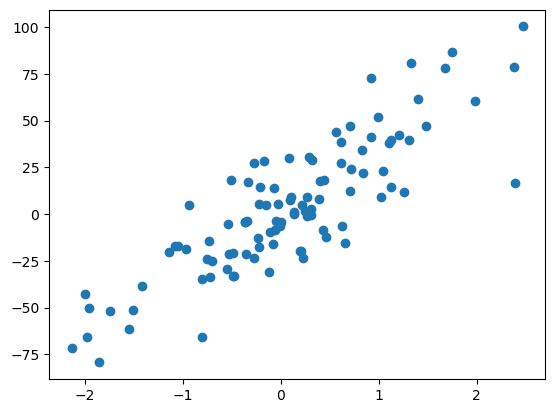

In [47]:
plt.scatter(x,y)

In [48]:
# splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 10)

In [91]:
class RidgeReg:
    def __init__(self, alpha=10):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        x_train = np.array(x_train).flatten()
        y_train = np.array(y_train).flatten()

        x_mean = x_train.mean()
        y_mean = y_train.mean()

        num = ((x_train - x_mean) * (y_train - y_mean)).sum()
        den = ((x_train - x_mean)**2).sum() + self.alpha

        self.coef_ = num / den
        self.intercept_ = y_mean - self.coef_ * x_mean

    def predict(self, x_test):
        x_test = np.array(x_test).flatten()
        return self.coef_ * x_test + self.intercept_


In [92]:
rid = RidgeReg(alpha = 10)

In [93]:
rid.fit(x_train,y_train)

In [95]:
rid.coef_

np.float64(24.467421273362714)

In [87]:
rid.intercept_

np.float64(0.6269553883424042)

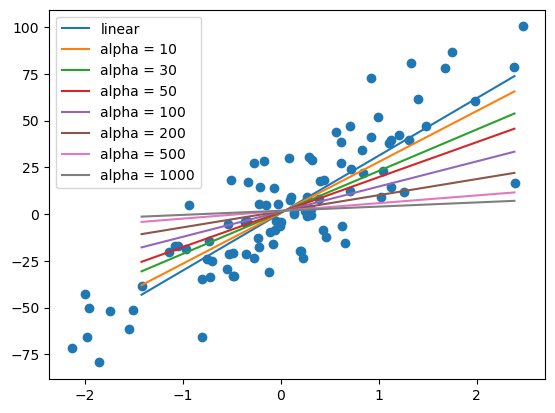

In [101]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_prediction = sorted(lr.predict(x_test))
x_test_sorted = sorted(x_test)

plt.scatter(x,y)
plt.plot(x_test_sorted,lr_prediction,label = 'linear')

for alpha_values in [10,30,50,100,200,500,1000]:
    rid = RidgeReg(alpha = alpha_values)
    rid.fit(x_train,y_train)
    predictions = sorted(rid.predict(x_test))
    plt.plot(x_test_sorted,predictions,label = f'alpha = {alpha_values}')

plt.legend()
plt.show()

# Ridge Regression - OLS 

In [20]:
# Importing dataset - diabetes dataset
from sklearn.datasets import load_diabetes

In [21]:
x,y = load_diabetes(return_X_y = True)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 30)

# Ridge Regularization - OLS

In [23]:
class RidgeMulti:
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x_train,y_train):
        X = np.array(x_train)
        Y = np.array(y_train).reshape(-1,1)

        # adding intercept column with ones in x 
        X = np.insert(X,0,1,axis = 1)

        # Identity matrix
        I = np.identity(X.shape[1])
        I[0][0] = 0

        # calculating betas
        betas = np.linalg.inv((X.T @ X) + (self.alpha * I)) @ (X.T @ Y)

        # coefficents and bias
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        

    def predict(x_test):
        pass

In [24]:
ridge_multi = RidgeMulti(alpha = 10)

In [25]:
ridge_multi.fit(x_train,y_train)

In [26]:
ridge_multi.intercept_

array([153.20450549])

In [27]:
ridge_multi.coef_

array([[ 18.74116052],
       [ -2.80663339],
       [ 61.42951003],
       [ 46.01961507],
       [ 15.45079841],
       [  9.1255777 ],
       [-38.4401903 ],
       [ 37.1838593 ],
       [ 59.7054645 ],
       [ 37.03971077]])

# Ridge Regression - Gradient Descent

In [80]:
import numpy as np

class RidgeGD:
    def __init__(self, alpha=0.01, learning_rate=0.01, epochs=100):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        X = np.array(x_train, dtype=float)
        Y = np.array(y_train, dtype=float).reshape(-1,1)
        m, n = X.shape

        # Add intercept column
        Xb = np.insert(X, 0, 1.0, axis=1)  # shape (m, n+1)

        # Initialize betas
        betas = np.zeros((n+1, 1))

        for epoch in range(self.epochs):
            y_pred = Xb @ betas
            # gradient with intercept not regularized
            grad = (1/m) * (Xb.T @ (y_pred - Y)) + (self.alpha/m) * np.vstack([[0], betas[1:]])
            betas -= self.learning_rate * grad

        self.intercept_ = float(betas[0,0])
        self.coef_ = betas[1:].flatten()

    def predict(self, x_test):
        X = np.array(x_test, dtype=float)
        return X @ self.coef_ + self.intercept_


In [81]:
ridge_gd = RidgeGD(epochs = 2000)

In [82]:
ridge_gd.fit(x_train,y_train)

In [83]:
ridge_gd.intercept_

153.24981285559508

In [84]:
ridge_gd.coef_

array([ 13.3698203 ,   0.0863481 ,  39.52072829,  29.79567672,
        11.93632201,   8.3017015 , -26.03621364,  26.47001146,
        39.10804715,  25.21182719])